In [1]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input dataset (4 samples, 2 features)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# Output dataset (AND logic gate)
y = np.array([[0],[0],[0],[1]])

# Initialize weights randomly with mean 0
np.random.seed(42)
weights_input_hidden = 2 * np.random.random((2,2)) - 1
weights_hidden_output = 2 * np.random.random((2,1)) - 1

learning_rate = 0.5
epochs = 10000

for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)
    
    # Calculate error
    error = y - predicted_output
    
    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

# After training
print("Predicted output after training:")
print(predicted_output)


Predicted output after training:
[[0.00231646]
 [0.01478795]
 [0.01548008]
 [0.49894676]]


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Sample data: XOR problem
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Build model
model = Sequential([
    Dense(8, input_dim=2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X, y, epochs=500, verbose=0)

# Evaluate model
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Accuracy: {accuracy*100:.2f}%")

# Predictions
print("Predictions:")
print(model.predict(X).round())


ImportError: Traceback (most recent call last):
  File "C:\Users\senth\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Simulated features: 1000 samples with 6 sensors each
np.random.seed(42)
X = np.random.rand(1000, 6)
# Labels: 0 (healthy) or 1 (failure)
y = np.random.randint(0, 2, (1000, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

class WindTurbineNN(nn.Module):
    def __init__(self):
        super(WindTurbineNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(6, 12),     # Input 6 → Hidden 12
            nn.ReLU(),
            nn.Linear(12, 8),     # Hidden 12 → Hidden 8
            nn.ReLU(),
            nn.Linear(8, 1),      # Hidden 8 → Output 1
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)
model = WindTurbineNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(100):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
        model.eval()
with torch.no_grad():
    predictions = model(X_test).round()
    accuracy = (predictions.eq(y_test)).sum().item() / y_test.size(0)
    print(f"\nTest Accuracy: {accuracy:.2%}")



Epoch 10, Loss: 0.6935
Epoch 20, Loss: 0.6920
Epoch 30, Loss: 0.6909
Epoch 40, Loss: 0.6900
Epoch 50, Loss: 0.6891
Epoch 60, Loss: 0.6883
Epoch 70, Loss: 0.6875
Epoch 80, Loss: 0.6867
Epoch 90, Loss: 0.6857
Epoch 100, Loss: 0.6847

Test Accuracy: 48.50%


Confusion Matrix:
[[ 0 95]
 [ 0  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.05      1.00      0.10         5

    accuracy                           0.05       100
   macro avg       0.03      0.50      0.05       100
weighted avg       0.00      0.05      0.00       100



C:\Users\senth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\senth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\senth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


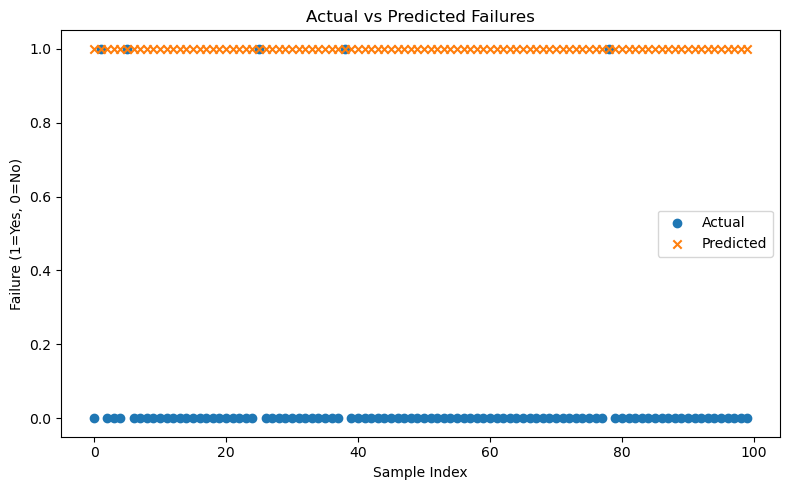

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Create sample data (simulating sensor readings and failures)
np.random.seed(42)

# 500 samples: sensor readings from wind turbines
n_samples = 500

data = {
    'temperature': np.random.normal(loc=75, scale=10, size=n_samples),     # degrees Fahrenheit
    'vibration': np.random.normal(loc=2, scale=0.5, size=n_samples),       # vibration level
    'oil_pressure': np.random.normal(loc=40, scale=5, size=n_samples),     # PSI
    'rpm': np.random.normal(loc=1500, scale=100, size=n_samples),          # revolutions per minute
    'humidity': np.random.uniform(low=10, high=90, size=n_samples),        # percentage
}

df = pd.DataFrame(data)

# Step 2: Simulate failure label (1 = Failure, 0 = Healthy)
# Use a basic logic: if temperature > 85, vibration > 2.5, or oil pressure < 35 → failure likely
df['failure'] = (
    (df['temperature'] > 85).astype(int) +
    (df['vibration'] > 2.5).astype(int) +
    (df['oil_pressure'] < 35).astype(int)
)
df['failure'] = (df['failure'] > 1).astype(int)  # Fail if 2+ risk factors triggered

# Step 3: Split data
X = df.drop('failure', axis=1)
y = df['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build and train the neural network
model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Visualize some predictions
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o')
plt.scatter(range(len(y_test)), y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted Failures")
plt.xlabel("Sample Index")
plt.ylabel("Failure (1=Yes, 0=No)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1️⃣: Synthetic Wind Turbine Sensor Data (features: 5, label: 0/1)
# Columns: temperature, vibration, oil_pressure, rpm, humidity
X = np.array([
    [85, 3.1, 30, 1500, 60],
    [90, 3.5, 28, 1400, 65],
    [70, 2.0, 35, 1600, 55],
    [88, 3.2, 32, 1550, 62],
    [60, 1.0, 40, 1700, 50],
    [95, 4.0, 25, 1300, 70],
    [72, 1.8, 37, 1650, 54],
    [87, 3.3, 31, 1520, 63],
    [65, 1.2, 38, 1680, 52],
    [92, 3.8, 27, 1350, 68],
])

y = np.array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1])  # 1 = failure, 0 = normal

# 2️⃣: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣: Neural Network Model
model = Sequential([
    Dense(10, input_shape=(5,), activation='relu'),  # hidden layer 1
    Dense(5, activation='relu'),                    # hidden layer 2
    Dense(1, activation='sigmoid')                  # output layer
])

# 4️⃣: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5️⃣: Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

# 6️⃣: Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {accuracy*100:.2f}%")

# 7️⃣: Predictions and report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# 1. Load CSV file
df = pd.read_csv('wind_turbine_data.csv')  # replace with your file path

# 2. Inspect first few rows (optional)
print(df.head())

# 3. Separate features and labels
# Assuming the CSV has columns: temperature, vibration, oil_pressure, rpm, humidity, failure_label
feature_cols = ['temperature', 'vibration', 'oil_pressure', 'rpm', 'humidity']
X = df[feature_cols].values
y = df['failure_label'].values  # 0 or 1

# 4. Preprocess features: scale them (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Build a neural network model (like before)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(len(feature_cols),)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# 8. Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy*100:.2f}%')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Step 1: Load CSV (replace filename with your CSV path)
df = pd.DataFrame({
    'Name': ['Sharmi1', 'Sharmi2', 'Sharmi3', 'Sharmi4', 'Sharmi5', 'Sharmi6'],
    'Class': ['1A', '2A', '3A', '4A', '5A', '6A'],
    'Marks': [99, 99, 99, 99, 99, 99]
})

# If you have a CSV file, use:
# df = pd.read_csv('yourfile.csv')

# Step 2: Encode categorical features (Name and Class)
le_name = LabelEncoder()
le_class = LabelEncoder()

df['Name_enc'] = le_name.fit_transform(df['Name'])
df['Class_enc'] = le_class.fit_transform(df['Class'])

# Step 3: Prepare features and labels
X = df[['Name_enc', 'Class_enc']].values
y = df['Marks'].values

# Step 4: Scale features and target (optional but recommended for NN)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Step 5: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Step 6: Build Neural Network for Regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)  # No activation for regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 7: Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Step 8: Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE (scaled): {mae:.4f}")

# Step 9: Predict and inverse transform to original scale
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predictions (original scale):", y_pred.flatten())


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

# Step 1: Create DataFrame (or load CSV)
df = pd.DataFrame({
    'Name': ['Sharmi1', 'Sharmi2', 'Sharmi3', 'Sharmi4', 'Sharmi5', 'Sharmi6'],
    'Class': ['1A', '2A', '3A', '4A', '5A', '6A'],
    'Marks': [99, 99, 99, 99, 99, 99]
})

# Step 2: Encode categorical features (Name and Class)
le_name = LabelEncoder()
le_class = LabelEncoder()

df['Name_enc'] = le_name.fit_transform(df['Name'])
df['Class_enc'] = le_class.fit_transform(df['Class'])

# Step 3: Prepare features and labels
X = df[['Name_enc', 'Class_enc']].values
y = df['Marks'].values

# Step 4: Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # Flatten for sklearn

# Step 5: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Step 6: Build and train the MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred_scaled = model.predict(X_test)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print(f"Test MAE (scaled): {mae_scaled:.4f}")

# Step 8: Inverse transform predictions to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))

print("Predictions (original scale):", y_pred.flatten())
print("True values (original scale):", y_test_orig.flatten())


Test MAE (scaled): 0.1430
Predictions (original scale): [99.2350664  99.05094394]
True values (original scale): [99. 99.]


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

# Step 1: Create DataFrame (or load CSV)
df = pd.DataFrame({
    'Name': ['Sharmi1', 'Sharmi2', 'Sharmi3', 'Sharmi4', 'Sharmi5', 'Sharmi6'],
    'Class': ['1A', '2A', '3A', '4A', '5A', '6A'],
    'Marks': [99, 99, 99, 99, 99, 99]
})

# Step 2: Encode categorical features (Name and Class)
le_name = LabelEncoder()
le_class = LabelEncoder()

df['Name_enc'] = le_name.fit_transform(df['Name'])
df['Class_enc'] = le_class.fit_transform(df['Class'])

# Step 3: Prepare features and labels
X = df[['Name_enc', 'Class_enc']].values
y = df['Marks'].values

# Step 4: Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # Flatten for sklearn

# Step 5: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Step 6: Build and train the MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred_scaled = model.predict(X_test)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print(f"Test MAE (scaled): {mae_scaled:.4f}")

# Step 8: Inverse transform predictions to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))

print("Predictions (original scale):", y_pred.flatten())
print("True values (original scale):", y_test_orig.flatten())


Test MAE (scaled): 0.1430
Predictions (original scale): [99.2350664  99.05094394]
True values (original scale): [99. 99.]
